# Cleaning the data

Usually we obtain the simulated data as a cgsn file, then use Paraview to turn it into a csv.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /home/fdht09/vincent/DeepXDE_test/Gitlab_proj/PINN_custom


In [3]:
print("Contents of current directory:", os.listdir('.'))

Contents of current directory: ['data_previsualization.ipynb', 'runs', '1serp_noChem_speed_animation_test.gif', 'wall_fct.ipynb', 'main.py', 'data_previsualization_2.ipynb', '.gitignore', '.git', 'data', 'requirements.txt', 'README.md', '__pycache__', 'src', 'results']


file path for the raw csv from Paraview

In [4]:
file_path = "./data/periodic_data_cleaned.csv"

In [5]:
df = pd.read_csv(file_path)

## Looking at rough description of data

In [6]:
df.sample(10)

,Time,point_id,Points:0,Points:1,Points:2,p,U:0,U:1,U:2
69787404,560.0,120081,3.3,1.650072,1.133333,-1.126204e-08,0.444340,-2.916906e-08,-1.139149e-10
61863591,4600.0,39609,0.3,0.596731,1.000000,-3.838477e-04,0.426858,-4.194277e-03,-1.152210e-02
22139393,2270.0,147280,0.8,1.726397,1.866667,-6.036700e-05,0.396229,-8.147057e-03,1.263775e-02
62094999,4610.0,117226,0.7,1.403269,1.066667,3.791132e-04,0.428311,5.368823e-03,-2.572982e-03
17754539,2010.0,68574,2.2,0.114619,1.800000,-4.163783e-05,0.174263,6.610261e-05,-8.934400e-05
47950707,3790.0,121706,1.8,1.995461,1.133333,1.334223e-04,0.080229,3.618041e-04,3.803175e-03
57720511,4360.0,48886,1.4,0.198883,1.266667,-8.409859e-04,0.369200,-4.010439e-03,-9.579443e-03
43026678,350.0,118989,0.7,1.978458,1.066667,-2.524080e-09,0.066682,1.009538e-09,-4.636162e-09
52572447,4050.0,129716,3.3,1.527982,1.400000,1.903913e-04,0.413734,1.156999e-02,-6.580820e-03
17931175,2020.0,91419,3.0,1.915571,0.333333,-3.786644e-05,0.134264,1.250190e-05,-5.712031e-05


May take some time to describe if the data is big.

In [7]:
df.describe()

,Time,point_id,Points:0,Points:1,Points:2,p,U:0,U:1,U:2
count,7.704929e+07,7.704929e+07,7.704929e+07,7.704929e+07,7.704929e+07,7.704929e+07,7.704929e+07,7.704929e+07,7.704929e+07
mean,2.500000e+03,7.689500e+04,2.000000e+00,1.000000e+00,1.000000e+00,1.590331e-05,3.081454e-01,-6.297386e-06,-1.241456e-04
std,1.446260e+03,4.439564e+04,1.183216e+00,7.831043e-01,5.962848e-01,6.356747e-04,1.443003e-01,6.359226e-03,1.031086e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.385121e-03,-8.813336e-03,-1.204620e-01,-1.552387e-01
25%,1.250000e+03,3.844700e+04,1.000000e+00,1.629123e-01,4.666667e-01,-9.548649e-05,2.039667e-01,-6.542691e-04,-1.708895e-03
50%,2.500000e+03,7.689500e+04,2.000000e+00,1.000000e+00,1.000000e+00,-1.415304e-09,3.637780e-01,0.000000e+00,0.000000e+00
75%,3.750000e+03,1.153430e+05,3.000000e+00,1.837088e+00,1.533333e+00,1.319332e-04,4.216372e-01,6.422824e-04,1.228451e-03
max,5.000000e+03,1.537900e+05,4.000000e+00,2.000000e+00,2.000000e+00,1.199402e-02,5.526472e-01,1.126035e-01,1.541705e-01


## Remove unecessary columns

In [19]:
## give the column names
print("Column names in the DataFrame:")
print(df.columns.tolist())

Column names in the DataFrame:
['Cell Type', 'Cell_Reynolds_Number', 'Coordinate:0', 'Coordinate:1', 'Coordinate:2', 'Mass_fraction_of_h2o', 'Mass_fraction_of_o2', 'Molar_Concentration_of_h2o', 'Molar_Concentration_of_o2', 'Mole_fraction_of_h2o', 'Mole_fraction_of_o2', 'Pressure', 'Relative_Humidity', 'Temperature', 'Velocity:0', 'Velocity:1', 'Velocity:2', 'VelocityMagnitude', 'dX-Velocity.dx', 'dX-Velocity.dy', 'dX-Velocity.dz', 'dY-Velocity.dx', 'dY-Velocity.dy', 'dY-Velocity.dz', 'dZ-Velocity.dx', 'dZ-Velocity.dy', 'dZ-Velocity.dz', 'dp-d:0', 'dp-d:1', 'dp-d:2']


In [20]:
## create a list of column to remove and remove them
columns_to_remove = ['Cell Type',
                     'Mass_fraction_of_h2o', 'Mass_fraction_of_o2', 'Molar_Concentration_of_h2o', 'Molar_Concentration_of_o2', 'Mole_fraction_of_h2o', 'Mole_fraction_of_o2',
                     'Relative_Humidity', 'Temperature',
                     'dX-Velocity.dx', 'dX-Velocity.dy', 'dX-Velocity.dz', 'dY-Velocity.dx', 'dY-Velocity.dy', 'dY-Velocity.dz', 'dZ-Velocity.dx', 'dZ-Velocity.dy', 'dZ-Velocity.dz', 'dp-d:0', 'dp-d:1', 'dp-d:2']
df.drop(columns=columns_to_remove, inplace=True)

Change the name of the columns to be in accord with the code (in src/data_process/load_data.py)

In [21]:
## Change names of the columns
df.rename(columns={
            'Coordinate:0': 'Points:0',
            'Coordinate:1': 'Points:1',
            'Coordinate:2': 'Points:2',
            'Pressure': 'p',
            'Velocity:0': 'U:0',
            'Velocity:1': 'U:1',
            'Velocity:2': 'U:2',}, inplace=True)

Optional (only do it after looking at the data): sometime there is an outlier point at one extremety which doesn't mean anything (maybe from Paraview)
Uncomment it if you need.
Also can serve as a block to do some last changes before saving the cleaned file.

In [ ]:
# remove the last point which is an outlier
# df =df[df["Points:0"] != 3.531500e+02] 

Save the cleaned file (next time use directly the cleaned file and skip the remove column part for faster loading)

In [ ]:
## save df into csv
output_file_path = "./data/1serp_noChem8_cleaned.csv"
df.to_csv(output_file_path, index=False)

## Separate the wall from the flow

In [17]:
df_wall = df[df['p'] == 0.]
df_wall = df_wall[df_wall['VelocityMagnitude'] == 0.]

mask_flow = df['p'] != 0.
mask_flow = mask_flow | df['VelocityMagnitude'] != 0.
df_flow = df[mask_flow]

In [ ]:
df_flow.describe()

## Plot the data

We are going to plot the data on a 2D slice and moving it on a third axis. The slice is going to have a depth that is determined by the number of step we want.

In [26]:
all_points = df[['Points:0', 'Points:1', 'Points:2']].values

In [ ]:
horiz_axis = 2 #Z
vert_axis = 0 #X
depth_axis = 1 #Y

In [5]:
depth_gross = np.linspace(all_points[:, depth_axis].min(), all_points[:, depth_axis].max(), num=40)
width_gross = depth_gross[1] - depth_gross[0]

NameError: name 'all_points' is not defined

Change here (replace df by another DataFrame) if you need to plot another data, like only the flow or the walls.

For example, replace df by df_flow to plot only the part where there is a flow.

In [28]:
points = df[['Points:0', 'Points:1', 'Points:2']].values
speed = df['VelocityMagnitude'].values

Start plot the speed

NameError: name 'points' is not defined

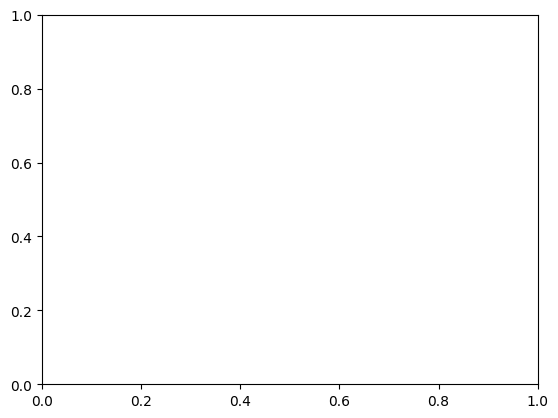

In [4]:
fig, ax = plt.subplots()
sc = ax.scatter(points[:, horiz_axis], points[:, vert_axis], c=speed, cmap='viridis', s=0.01)
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Speed at Y = 0')
def update(frame):
    ax.clear()
    ax.set_title(f'Speed at Y = {frame}')
    mask = points[:, depth_axis] >= frame - width_gross / 2
    mask &= points[:, depth_axis] <= frame + width_gross / 2
    sc = ax.scatter(points[mask, horiz_axis], points[mask, vert_axis], c=speed[mask], cmap='viridis', s=1)
    return sc,

ani = FuncAnimation(fig, update, frames=depth_gross, blit=False, repeat=True)
plt.colorbar(sc, ax=ax, label='Speed')
## save plot
ani.save('1serp_noChem_speed_animation_test.gif', writer='imagemagick', fps=10)

Optional : Plot only the points (without coloring the speed of the fluid)

In [ ]:
fig, ax = plt.subplots()
sc = ax.scatter(points[:, 2], points[:, 0], c = "red", s = 1)
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Speed at Z = 0')
def update(frame):
    ax.clear()
    ax.set_title(f'Speed at Z = {frame}')
    mask = points[:, 1] >= frame - width_gross / 2
    mask &= points[:, 1] <= frame + width_gross / 2
    sc = ax.scatter(points[mask, 2], points[mask, 0], c = "red", s = 1)
    return sc,
ani = FuncAnimation(fig, update, frames=depth_gross, blit=False, repeat=True)
## save plot
ani.save('battery.gif', writer='imagemagick', fps=20)

After looking at the speed gif, we are going to only take the slice that represents either anode or cathode.

We are going to work on the second half of the flow channel (bigger Y)

In [15]:
print("start of the flow", depth_gross[22])
print("end of the flow", depth_gross[30])

start of the flow 0.0025688263333333333
end of the flow 0.003484861


In [ ]:
points.shape

## Save the flow data only

In [ ]:
start_slice = 22
end_slice = 30

In [ ]:
df_flow_slice = df_flow[df_flow['Points:1'] >= depth_gross[start_slice]]
df_flow_slice = df_flow_slice[df_flow_slice['Points:1'] <= depth_gross[end_slice]]

df_wall_slice = df_wall[df_wall['Points:1'] >= depth_gross[start_slice]]
df_wall_slice = df_wall_slice[df_wall_slice['Points:1'] <= depth_gross[end_slice]]


In [19]:
save_file = "./data/1serp_noChem_cleaned_flow_sliced.csv"
df_flow_slice.to_csv(save_file, index=False)

In [20]:
save_file = "./data/1serp_noChem_cleaned_wall_sliced.csv"
df_wall_slice.to_csv(save_file, index=False)